# Managing flowsheets

### Retrieve any Unit, Stream or System object by ID

All BioSTEAM objects are registered in the main flowsheet. When BioSTEAM is first imported, the main flowsheet defaults to the 'default' flowsheet:

In [1]:
from biosteam import main_flowsheet as F, settings, units
import biosteam as bst
bst.nbtutorial() # Light-mode html diagrams and filter warnings
F

<MainFlowsheet: default>

Find a Unit object:

In [2]:
settings.set_thermo(['Water', 'Ethanol'])
units.Mixer('M1')
F.M1.diagram()
F.M1.show()

Mixer: M1
ins...
[0] s2
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0
[1] s3
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0
outs...
[0] s1
    phase: 'l', T: 298.15 K, P: 101325 Pa
    flow: 0


Find a Stream object:

In [3]:
F.s1.show()

Stream: s1 from <Mixer: M1>
phase: 'l', T: 298.15 K, P: 101325 Pa
flow: 0


All Unit objects can be viewed as a diagram:

In [4]:
units.Mixer('M2')
F.diagram()

All Stream, Unit, and System objects are stored within Register objects in the `main_flowsheet`:

In [5]:
F.stream

Register:
 <Stream: s1>
 <Stream: s2>
 <Stream: s3>
 <Stream: s4>
 <Stream: s5>
 <Stream: s6>


In [6]:
F.unit

Register:
 <Mixer: M1>
 <Mixer: M2>


In [7]:
F.system

Register: (Empty)


### Switch between flowsheets

A new flowsheet may be created and set as the main flowsheet:

In [8]:
F.set_flowsheet('new_flowsheet')
F

<MainFlowsheet: new_flowsheet>

Now all new objects will be registered in the new flowsheet:

In [9]:
units.Mixer('M3')
F.diagram()

Note that objects in the original flowsheet are not defined anymore and searching them would raise an error:

In [10]:
F.M1

AttributeError: no registered item 'M1'

All Flowsheet objects are added to the `flowsheet` registry. Switching between flowsheets is easy:

In [11]:
F.set_flowsheet('default') # Switch back to default flowsheet
F

<MainFlowsheet: default>

Biorefineries within the [Bioindustrial-Park](https://github.com/BioSTEAMDevelopmentGroup/Bioindustrial-Park) define their own flowsheet when you import it:

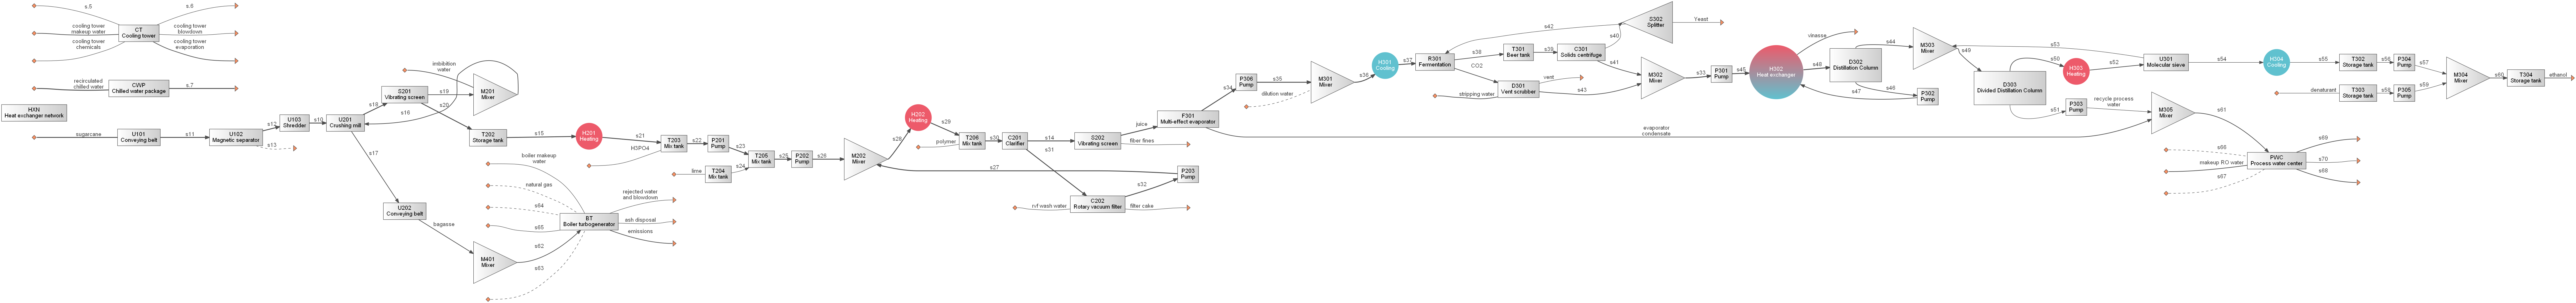

In [12]:
from biorefineries.sugarcane import sugarcane_sys
F.diagram(format='png')